In [8]:
library(WRS2)
library(tidyverse)
library(effsize)
library(rogme)
library(gridExtra)
library(cowplot)

In [9]:
df<-read.csv('df_nogo_smok_acc.csv')

df$Session<-recode_factor(df$Session, '1'='pre', '2'='post' )
df$Subject<-factor(df$Subject)
df$Session<-factor(df$Session)

In [10]:
df

X,Group,Session,Subject,accuracy
<int>,<fct>,<fct>,<fct>,<dbl>
0,ctr,pre,172,8.536585
1,ctr,pre,185,2.439024
2,ctr,pre,271,8.536585
3,ctr,pre,279,13.414634
4,ctr,pre,295,13.414634
5,ctr,pre,339,6.097561
6,ctr,pre,388,10.975610
7,ctr,pre,428,2.439024
8,ctr,pre,429,10.975610


In [11]:
# robust mixed design anova (2 samples repeated measures)
bwtrim(accuracy~Group*Session, id=Subject, data=df)

Call:
bwtrim(formula = accuracy ~ Group * Session, id = Subject, data = df)

               value df1     df2 p.value
Group         0.1733   1 25.3661  0.6807
Session       4.4097   1 22.9622  0.0469
Group:Session 0.1984   1 22.9622  0.6602


In [12]:
# within group effect only = effect of session
sppbb(accuracy~Group*Session, id=Subject, data=df)

Call:
sppbb(formula = accuracy ~ Group * Session, id = Subject, data = df)

Test statistics:
         Estimate
pre-post    1.829

Test whether the corrresponding population parameters are the same:
p-value: 0.044 


In [13]:
aggregate(accuracy~Group*Session ,data=df, mean, trim=0.2)

Group,Session,accuracy
<fct>,<fct>,<dbl>
ctr,pre,7.404181
int,pre,6.620209
ctr,post,5.662021
int,post,5.487805


In [14]:
df_pre<-df %>% filter(Session=='pre')
df_post<-df %>% filter(Session=='post')

df_int<-df %>% filter(Group=='int')
df_ctr<-df %>% filter(Group=='ctr')


Warning message:
“Ignoring unknown parameters: fun.y, fun.ymin, fun.ymax”
Warning message:
“Ignoring unknown parameters: fun.y, fun.ymin, fun.ymax”
Warning message:
“Ignoring unknown parameters: fun.y, fun.ymin, fun.ymax”
Warning message:
“Ignoring unknown parameters: fun.y, fun.ymin, fun.ymax”
Warning message:
“Ignoring unknown parameters: fun.y, fun.ymin, fun.ymax”
Warning message:
“Ignoring unknown parameters: fun.y, fun.ymin, fun.ymax”
Warning message:
“Ignoring unknown parameters: fun.y, fun.ymin, fun.ymax”
Warning message:
“Ignoring unknown parameters: fun.y, fun.ymin, fun.ymax”
Warning message:
“Ignoring unknown parameters: fun.y, fun.ymin, fun.ymax”
Warning message:
“Ignoring unknown parameters: fun.y, fun.ymin, fun.ymax”
Warning message:
“Ignoring unknown parameters: fun.y, fun.ymin, fun.ymax”
Warning message:
“Ignoring unknown parameters: fun.y, fun.ymin, fun.ymax”
Warning message:
“Ignoring unknown parameters: fun.y, fun.ymin, fun.ymax”
Warning message:
“Ignoring unknown par

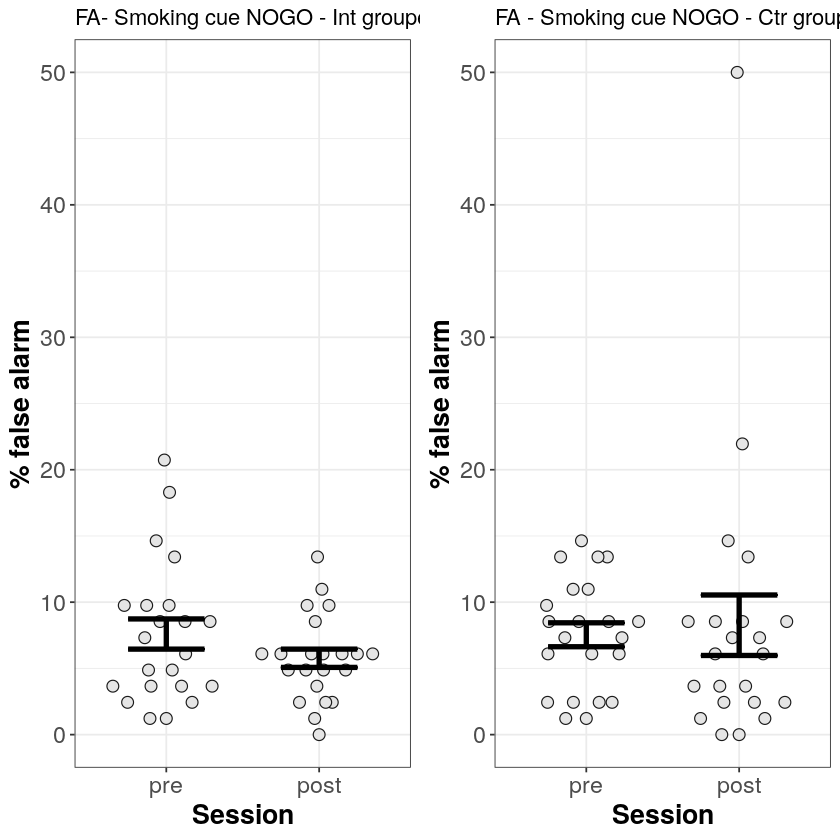

In [18]:
ps1<-plot_scat2(df_int, 
               formula=accuracy~Session,
               ylabel=" % false alarm ", 
                alpha = 1,
                shape = 21,
                colour = "grey10",
                fill = "grey90",
                size = 3)+
    scale_y_continuous(limits = c(0, 50))
              
              
#ps1<-ps1+coord_flip()
strip1 <- plot_hd_bars(ps1, 
                     col="black", 
                    q_size = 0.5,
                      md_size = 1.5,
                      alpha = 1)


strip1<-strip1+ggtitle('FA- Smoking cue NOGO - Int groupe')

ps2<-plot_scat2(df_ctr, 
               formula=accuracy~Session,
               ylabel="% false alarm", 
               alpha = 1,
                shape = 21,
                colour = "grey10",
                fill = "grey90",
                size = 3)+
    scale_y_continuous(limits = c(0, 50))

              

strip2 <- plot_hd_bars(ps2, 
                     col="black", 
                    q_size = 0.5,
                      md_size = 1.5,
                      alpha = 1)

#ps2<-ps2+strip2
strip2<- strip2+ggtitle('FA - Smoking cue NOGO - Ctr groupe')


grid.arrange(strip1, strip2, ncol=2)
            

There is a reduction in false alarm rate in session 2 compared to session 1 for the intervention group (p=0.044). 

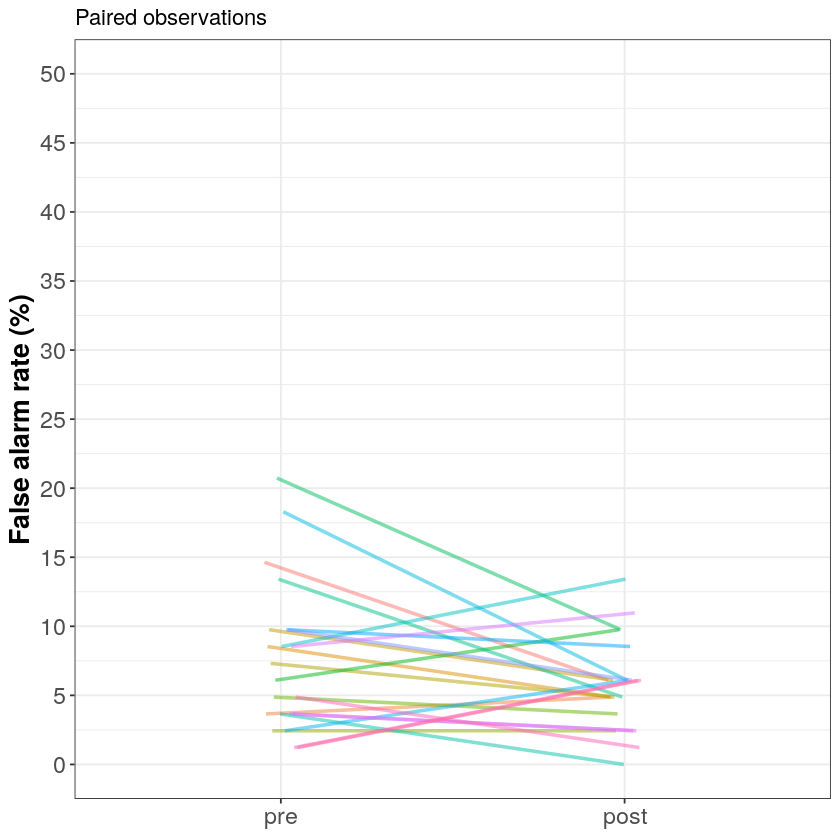

In [24]:
pd <- position_dodge(width = 0.1)
linkedstrip_int <- ggplot(df_int, aes(x=Session, y=accuracy, group=Subject)) +
                geom_line(aes(colour=Subject),size=1, alpha=.5,
                          position=pd) +
                theme_bw() +
                theme(axis.text.x = element_text(size=14),
                      axis.text.y = element_text(size=14),
                      axis.title.x = element_blank(),
                      axis.title.y = element_text(size=16,face="bold"),
                      legend.position="none") +
                  labs(title="Paired observations") +
                ylab("False alarm rate (%)") +
                #scale_x_discrete(labels = c("pre" = "Pre-test","condition2" = "Condition 2")) +
                scale_y_continuous(limits=c(0, 50),breaks=seq(0,50,5))
linkedstrip_int

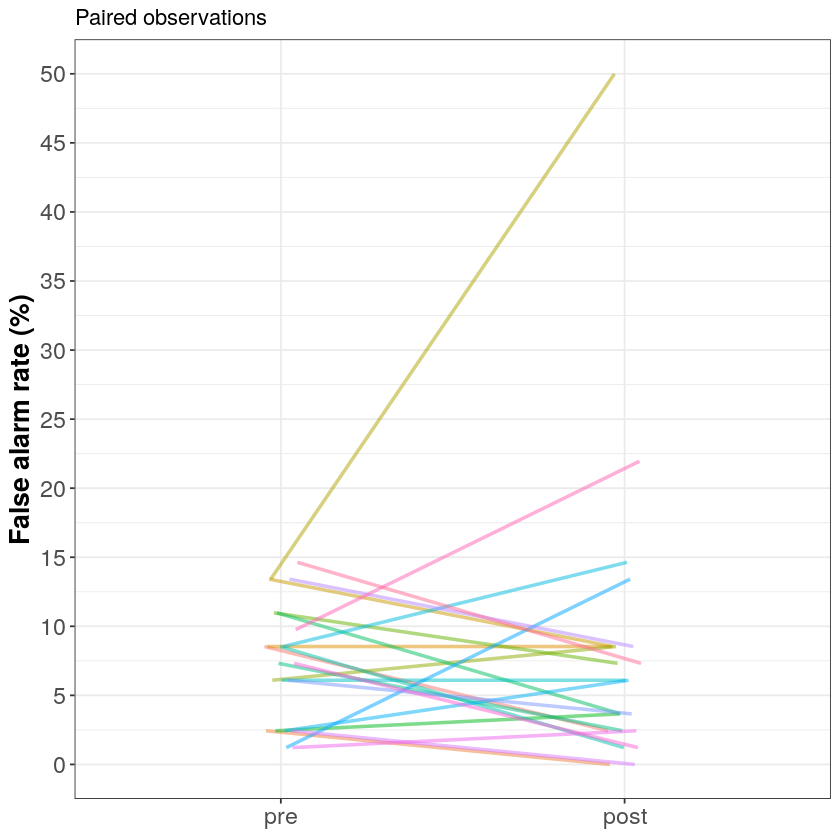

In [25]:
pd <- position_dodge(width = 0.1)
linkedstrip_ctr <- ggplot(df_ctr, aes(x=Session, y=accuracy, group=Subject)) +
                geom_line(aes(colour=Subject),size=1, alpha=.5,
                          position=pd) +
                theme_bw() +
                theme(axis.text.x = element_text(size=14),
                      axis.text.y = element_text(size=14),
                      axis.title.x = element_blank(),
                      axis.title.y = element_text(size=16,face="bold"),
                      legend.position="none") +
                 labs(title="Paired observations") +
                ylab("False alarm rate (%)") +
                #scale_x_discrete(labels = c("pre" = "Pre-test","condition2" = "Condition 2")) +
                scale_y_continuous(limits=c(0, 50),breaks=seq(0,50,5))
linkedstrip_ctr